<a href="https://colab.research.google.com/github/tanishq150802/CO-Temperature-tume-series-forcasting/blob/main/ieee_timeseries_co.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is the code for ARIMA model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
index=['Date','Time']
data = pd.read_csv("/content/drive/MyDrive/NLP_covid/AirQualityUCI.csv", index_col=index)

DATA PREPROCESSING

In [27]:
data=data.drop("Unnamed: 15",axis=1)
data=data.drop("Unnamed: 16",axis=1)

In [28]:
data.rename(columns={'CO(GT)':'co','T':'t'},inplace=True)

In [29]:
data=data[data.co>=0] #dropping negative values for CO
data=data[data.t>0] #dropping meaningless/impossible values for T

In [30]:
data.dropna(subset=['co'], inplace=True) #dropping NaN values
data.dropna(subset=['t'], inplace=True)

In [31]:
data.head(5)

co  PT08.S1(CO)  NMHC(GT)  ...     t    RH      AH
Date       Time                                  ...                    
10-03-2004 18:00:00  2.6       1360.0     150.0  ...  13.6  48.9  0.7578
           19:00:00  2.0       1292.0     112.0  ...  13.3  47.7  0.7255
           20:00:00  2.2       1402.0      88.0  ...  11.9  54.0  0.7502
           21:00:00  2.2       1376.0      80.0  ...  11.0  60.0  0.7867
           22:00:00  1.6       1272.0      51.0  ...  11.2  59.6  0.7888

[5 rows x 13 columns]

In [32]:
print(len(data['co']), len(data['t']))

7331 7331


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7331 entries, ('10-03-2004', '18:00:00') to ('04-04-2005', '14:00:00')
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   co             7331 non-null   float64
 1   PT08.S1(CO)    7331 non-null   float64
 2   NMHC(GT)       7331 non-null   float64
 3   C6H6(GT)       7331 non-null   float64
 4   PT08.S2(NMHC)  7331 non-null   float64
 5   NOx(GT)        7331 non-null   float64
 6   PT08.S3(NOx)   7331 non-null   float64
 7   NO2(GT)        7331 non-null   float64
 8   PT08.S4(NO2)   7331 non-null   float64
 9   PT08.S5(O3)    7331 non-null   float64
 10  t              7331 non-null   float64
 11  RH             7331 non-null   float64
 12  AH             7331 non-null   float64
dtypes: float64(13)
memory usage: 780.0+ KB


In [10]:
co=data['co'].tolist()
t=data['t'].tolist()
print(max(co),max(t))

11.9 44.6


In [13]:
data['co']=data['co']/11.9
data['t']=data['t']/44.6

In [34]:
data.head()

co  PT08.S1(CO)  NMHC(GT)  ...     t    RH      AH
Date       Time                                  ...                    
10-03-2004 18:00:00  2.6       1360.0     150.0  ...  13.6  48.9  0.7578
           19:00:00  2.0       1292.0     112.0  ...  13.3  47.7  0.7255
           20:00:00  2.2       1402.0      88.0  ...  11.9  54.0  0.7502
           21:00:00  2.2       1376.0      80.0  ...  11.0  60.0  0.7867
           22:00:00  1.6       1272.0      51.0  ...  11.2  59.6  0.7888

[5 rows x 13 columns]

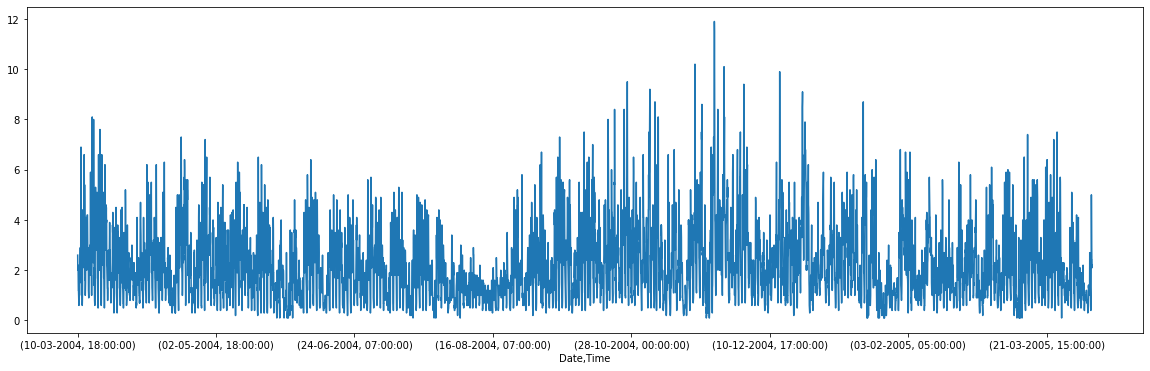

In [35]:
from pandas import read_csv
from matplotlib import pyplot #time series for CO
fig = plt.figure()
series=data["co"]
series.plot()
fig.set_figheight(6)
fig.set_figwidth(20)
pyplot.show()

In [16]:
type(series)

pandas.core.series.Series

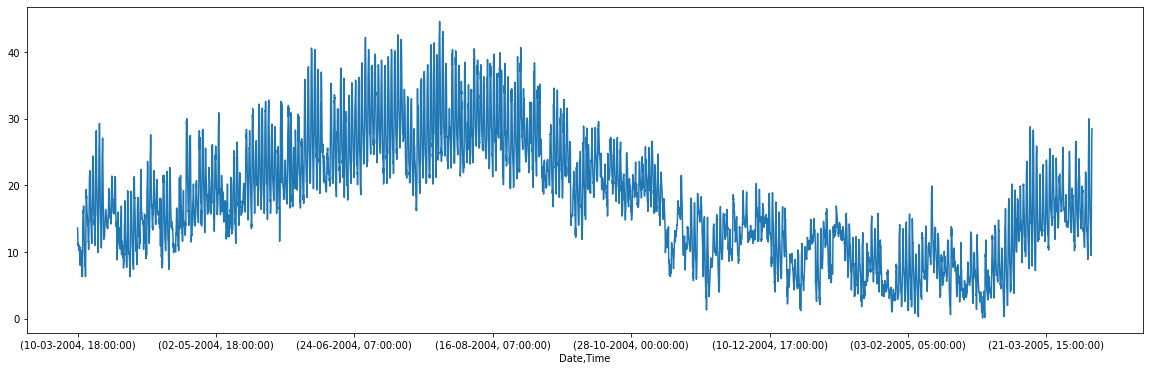

In [36]:
from pandas import read_csv #time series for T
from matplotlib import pyplot
fig = plt.figure() 
series1=data["t"]
series1.plot()
fig.set_figheight(6)
fig.set_figwidth(20)
pyplot.show()

In [18]:
from pandas import Series #stats for CO
series=Series(series)
# summary stats
print(series.describe())

count    7331.000000
mean        0.179155
std         0.120702
min         0.008403
25%         0.092437
50%         0.151261
75%         0.235294
max         1.000000
Name: co, dtype: float64


In [19]:
series1=Series(series1) #stats for Temp
# summary stats
print(series1.describe())

count    7331.000000
mean        0.399175
std         0.198122
min         0.002242
25%         0.251121
50%         0.378924
75%         0.533632
max         1.000000
Name: t, dtype: float64


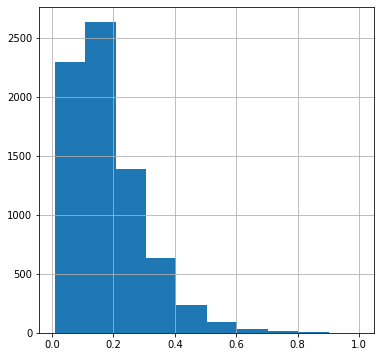

In [20]:
# histogram plot
fig = plt.figure()
series.hist()
fig.set_figheight(6)
fig.set_figwidth(6)
pyplot.show()

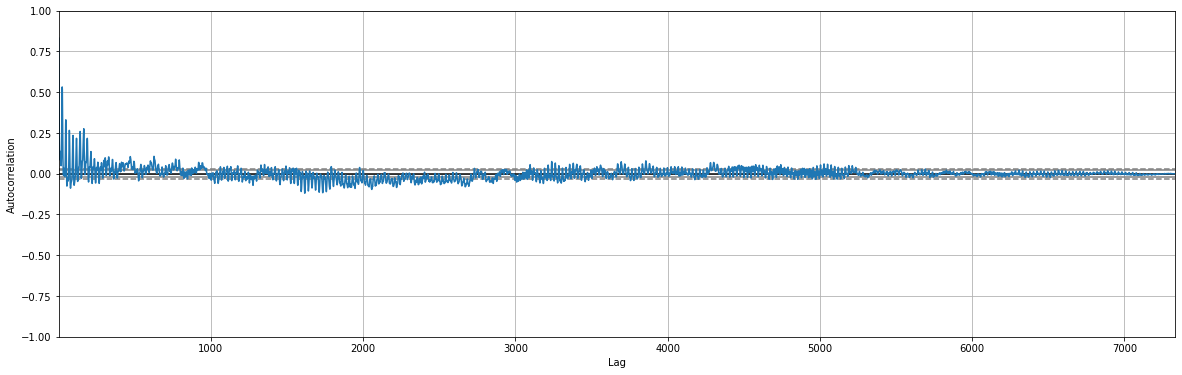

In [21]:
from pandas.plotting import autocorrelation_plot #aurocorrelation showing positive inclination initially
# line plot
fig = plt.figure()
autocorrelation_plot(series)
fig.set_figheight(6)
fig.set_figwidth(20)
pyplot.show()

In [22]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
from sklearn.metrics import mean_absolute_percentage_error #arima model and evaluation
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.80)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_absolute_percentage_error(test, predictions)
	return error

In [24]:
evaluate_arima_model(series,(7,1,0)) #MAPE for CO

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.3061981657100548

In [25]:
evaluate_arima_model(series1,(7,1,0)) #MAPE for Temp

0.10167239154329467